In [161]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
flight=pd.read_csv("Flight_status (1).csv")
flight.head(10)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,23-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0
1,24-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0
2,25-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0
3,26-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,...,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0
4,27-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,...,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0
5,28-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1202.0,NaN,NaN,...,1236.0,1313.0,13.0,1304,22.0,1.0,1.0,1300-1359,1,0
6,29-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1204.0,2.0,2.0,...,1219.0,1253.0,10.0,1304,-1.0,0.0,-1.0,1300-1359,1,0
7,30-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1200.0,1244.0,11.0,1304,-9.0,0.0,-1.0,1300-1359,1,0
8,31-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1219.0,1256.0,8.0,1304,NaN,NaN,NaN,1300-1359,1,0
9,03-01-2018,Endeavor Air Inc.,ATL,ABY,False,False,1037,1101.0,24.0,24.0,...,1124.0,1156.0,3.0,1137,22.0,1.0,1.0,1100-1159,1,0


In [3]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 61 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   FlightDate                               1048575 non-null  object 
 1   Airline                                  1048575 non-null  object 
 2   Origin                                   1048575 non-null  object 
 3   Dest                                     1048575 non-null  object 
 4   Cancelled                                1048575 non-null  bool   
 5   Diverted                                 1048575 non-null  bool   
 6   CRSDepTime                               1048575 non-null  int64  
 7   DepTime                                  1032002 non-null  float64
 8   DepDelayMinutes                          1031514 non-null  float64
 9   DepDelay                                 1031514 non-null  float64
 10  ArrTime           

In [4]:
#Some Useless Columns:
#1>Flight_Number_Marketing_Airline
#2>Operated_or_Branded_Code_Share_Partners 
#3>DOT_ID_Marketing_Airline                   
#4>IATA_Code_Marketing_Airline              
#5>Flight_Number_Marketing_Airline
#6>Operating_Airline
#7>DOT_ID_Operating_Airline                   
#8>IATA_Code_Operating_Airline               
#9>Tail_Number                               
#10>Flight_Number_Operating_Airline
#11>OriginAirportID
#13>OriginStateFips
#14>OriginAirportSeqID                         
#15>OriginCityMarketID
#16>OriginWac
#17>DestAirportID                             
#18>DestAirportSeqID                          
#19>DestCityMarketID 
#20>DestStateFips                          
#21>DestWac
#22>Marketing_Airline_Network 
#23>"Year"
#24>FlightDate
#Dropping them

In [5]:
flight2=flight.drop(["FlightDate","Year","Marketing_Airline_Network","Flight_Number_Marketing_Airline","Operated_or_Branded_Code_Share_Partners","DOT_ID_Marketing_Airline",
"IATA_Code_Marketing_Airline","Flight_Number_Marketing_Airline","Operating_Airline","DOT_ID_Operating_Airline","IATA_Code_Operating_Airline",
"Tail_Number","Flight_Number_Operating_Airline","OriginAirportID","OriginStateFips","OriginAirportSeqID",
"OriginCityMarketID","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID", "DestStateFips","DestWac","OriginState","DestState"],axis=1)

In [6]:
flight2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Airline               1048575 non-null  object 
 1   Origin                1048575 non-null  object 
 2   Dest                  1048575 non-null  object 
 3   Cancelled             1048575 non-null  bool   
 4   Diverted              1048575 non-null  bool   
 5   CRSDepTime            1048575 non-null  int64  
 6   DepTime               1032002 non-null  float64
 7   DepDelayMinutes       1031514 non-null  float64
 8   DepDelay              1031514 non-null  float64
 9   ArrTime               1031060 non-null  float64
 10  ArrDelayMinutes       1029014 non-null  float64
 11  AirTime               1028355 non-null  float64
 12  CRSElapsedTime        1048575 non-null  int64  
 13  ActualElapsedTime     1029216 non-null  float64
 14  Distance              1048575 non-

In [7]:
flight2.head()

,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1256.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0
1,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1258.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0
2,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,1302.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0
3,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,1253.0,...,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0
4,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,1459.0,...,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0


In [8]:
flight2.isnull().sum()

Airline                     0
Origin                      0
Dest                        0
Cancelled                   0
Diverted                    0
CRSDepTime                  0
DepTime                 16573
DepDelayMinutes         17061
DepDelay                17061
ArrTime                 17515
ArrDelayMinutes         19561
AirTime                 20220
CRSElapsedTime              0
ActualElapsedTime       19359
Distance                    0
Quarter                     0
Month                       0
DayofMonth                  0
DayOfWeek                   0
OriginCityName              0
OriginStateName             0
DestCityName                0
DestStateName               0
DepDel15                17061
DepartureDelayGroups    17061
DepTimeBlk                  0
TaxiOut                 17756
WheelsOff               17747
WheelsOn                18367
TaxiIn                  18376
CRSArrTime                  0
ArrDelay                19561
ArrDel15                19561
ArrivalDel

In [9]:
print(flight["DepDelayMinutes"].value_counts())

0.0       706275
1.0        21469
2.0        16983
3.0        14754
4.0        13319
           ...  
752.0          1
1168.0         1
645.0          1
724.0          1
1132.0         1
Name: DepDelayMinutes, Length: 1052, dtype: int64


In [10]:
print(flight["DepDelay"].value_counts())

-5.0       84344
-4.0       79654
-3.0       76187
-2.0       68532
-6.0       67489
           ...  
 1418.0        1
 1032.0        1
 937.0         1
 869.0         1
 1020.0        1
Name: DepDelay, Length: 1162, dtype: int64


In [11]:
print(flight["DepDel15"].value_counts())

0.0    860830
1.0    170684
Name: DepDel15, dtype: int64


In [12]:
print(flight["DepartureDelayGroups"].value_counts())

-1.0     647834
 0.0     204086
 1.0      61959
 2.0      32487
 3.0      20037
 4.0      12990
 12.0     10022
 5.0       9263
-2.0       8910
 6.0       6805
 7.0       5341
 8.0       4004
 9.0       3157
 10.0      2555
 11.0      2064
Name: DepartureDelayGroups, dtype: int64


In [13]:
print(flight["DistanceGroup"].value_counts())

2     271985
3     204999
4     154129
1     152274
5     101676
7      42164
6      41447
10     25696
8      20987
11     18588
9      14630
Name: DistanceGroup, dtype: int64


In [14]:
print(flight["DivAirportLandings"].value_counts())

0    1046115
1       2265
9        167
2         28
Name: DivAirportLandings, dtype: int64


In [15]:
# For departure and arrival delay we already have 2 columns. Thus we remove the ones which has -ve values 

In [16]:
flight3 = flight2.drop(["DepDelay","ArrDelay"],axis=1)

In [17]:
flight3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 35 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Airline               1048575 non-null  object 
 1   Origin                1048575 non-null  object 
 2   Dest                  1048575 non-null  object 
 3   Cancelled             1048575 non-null  bool   
 4   Diverted              1048575 non-null  bool   
 5   CRSDepTime            1048575 non-null  int64  
 6   DepTime               1032002 non-null  float64
 7   DepDelayMinutes       1031514 non-null  float64
 8   ArrTime               1031060 non-null  float64
 9   ArrDelayMinutes       1029014 non-null  float64
 10  AirTime               1028355 non-null  float64
 11  CRSElapsedTime        1048575 non-null  int64  
 12  ActualElapsedTime     1029216 non-null  float64
 13  Distance              1048575 non-null  int64  
 14  Quarter               1048575 non-

In [18]:
flight3.columns

Index(['Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'AirTime',
       'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'OriginCityName', 'OriginStateName',
       'DestCityName', 'DestStateName', 'DepDel15', 'DepartureDelayGroups',
       'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'CRSArrTime', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'DistanceGroup', 'DivAirportLandings'],
      dtype='object')

# PROBLEM 1:Predict which flights will be cancelled or delayed(Classification)

In [19]:
flight3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 35 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Airline               1048575 non-null  object 
 1   Origin                1048575 non-null  object 
 2   Dest                  1048575 non-null  object 
 3   Cancelled             1048575 non-null  bool   
 4   Diverted              1048575 non-null  bool   
 5   CRSDepTime            1048575 non-null  int64  
 6   DepTime               1032002 non-null  float64
 7   DepDelayMinutes       1031514 non-null  float64
 8   ArrTime               1031060 non-null  float64
 9   ArrDelayMinutes       1029014 non-null  float64
 10  AirTime               1028355 non-null  float64
 11  CRSElapsedTime        1048575 non-null  int64  
 12  ActualElapsedTime     1029216 non-null  float64
 13  Distance              1048575 non-null  int64  
 14  Quarter               1048575 non-

# GLOSSARY

#Airline = Airline Names
#Origin =  Starting Airport
#Dest =   Destination Airport
#Cancelled = Cancelled Flights(1 = cancelled)
#Diverted = Aircraft landed on different airport that the one scheduled
#CRSDepTime = Planned Departure Time
#DepTime = Actual Departure Time(WHEEL_OFF - TAXI_OUT)
#DepDelayMinutes =  Total Delay on Departure in minutes
#ArrTime =  Actual Arrival Time( WHEELS_ON + TAXI_IN)
#ArrDelayMinutes = Total Delay on Arrival in minutes
#AirTime = The time duration between wheels_off and wheels_on time
#CRSElapsedTime = Planned or scheduled time amount needed for the flight trip
#ActualElapsedTime = Actual Time the flight travels in air
#Distance = Distance between airports 
#Quarter = 
#Month= 
#DayofMonth = 
#DayOfWeek = 
#OriginCityName
#OriginState
#OriginStateName
#DestCityName
#DestState
#DestStateName
#DepDel15= Departure Delay Indicator, 15 Minutes or More (1=Yes)
#DepartureDelayGroups = 
#DepTimeBlk = CRS Departure Time Block, Hourly Intervals



#WheelsOff = The time point that the aircraft's wheels leave the ground

#WheelsOn = The time point that the aircraft's wheels touch on the ground

#TaxiIn = The time duration elapsed between wheels-on and gate arrival at the destination airport

#TaxiOut = The time duration elapsed between departure from the origin airport gate and wheels off

#CRSArrTime
#ArrDel15
#ArrivalDelayGroups
#ArrTimeBlk = CRS Arrival Time Block, Hourly Intervals
#DistanceGroup
#DivAirportLandings



#Distance = Distance between airports
#TaxiOut
#WheelsOff
#WheelsOn
#DistanceGroup

In [20]:
flight3.isnull().sum()

Airline                     0
Origin                      0
Dest                        0
Cancelled                   0
Diverted                    0
CRSDepTime                  0
DepTime                 16573
DepDelayMinutes         17061
ArrTime                 17515
ArrDelayMinutes         19561
AirTime                 20220
CRSElapsedTime              0
ActualElapsedTime       19359
Distance                    0
Quarter                     0
Month                       0
DayofMonth                  0
DayOfWeek                   0
OriginCityName              0
OriginStateName             0
DestCityName                0
DestStateName               0
DepDel15                17061
DepartureDelayGroups    17061
DepTimeBlk                  0
TaxiOut                 17756
WheelsOff               17747
WheelsOn                18367
TaxiIn                  18376
CRSArrTime                  0
ArrDel15                19561
ArrivalDelayGroups      19561
ArrTimeBlk                  0
DistanceGr

In [21]:
flight3.dropna(subset=["DepDel15","ArrDel15"], axis=0, inplace=True)

In [22]:
flight3.reset_index(drop=True, inplace=True)

In [23]:
flight3.isnull().sum()

Airline                   0
Origin                    0
Dest                      0
Cancelled                 0
Diverted                  0
CRSDepTime                0
DepTime                   0
DepDelayMinutes           0
ArrTime                   0
ArrDelayMinutes           0
AirTime                 861
CRSElapsedTime            0
ActualElapsedTime         0
Distance                  0
Quarter                   0
Month                     0
DayofMonth                0
DayOfWeek                 0
OriginCityName            0
OriginStateName           0
DestCityName              0
DestStateName             0
DepDel15                  0
DepartureDelayGroups      0
DepTimeBlk                0
TaxiOut                 857
WheelsOff               857
WheelsOn                852
TaxiIn                  852
CRSArrTime                0
ArrDel15                  0
ArrivalDelayGroups        0
ArrTimeBlk                0
DistanceGroup             0
DivAirportLandings        0
dtype: int64

In [24]:
flight4 = flight3.drop(["CRSDepTime","DepTime","ArrTime","CRSArrTime","WheelsOff","WheelsOn"],axis=1)

In [25]:
flight4.dtypes

Airline                  object
Origin                   object
Dest                     object
Cancelled                  bool
Diverted                   bool
DepDelayMinutes         float64
ArrDelayMinutes         float64
AirTime                 float64
CRSElapsedTime            int64
ActualElapsedTime       float64
Distance                  int64
Quarter                   int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
OriginCityName           object
OriginStateName          object
DestCityName             object
DestStateName            object
DepDel15                float64
DepartureDelayGroups    float64
DepTimeBlk               object
TaxiOut                 float64
TaxiIn                  float64
ArrDel15                float64
ArrivalDelayGroups      float64
ArrTimeBlk               object
DistanceGroup             int64
DivAirportLandings        int64
dtype: object

In [26]:
import random
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [27]:
imputer = MissForest()

In [28]:
flight4

,Airline,Origin,Dest,Cancelled,Diverted,DepDelayMinutes,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,...,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,TaxiIn,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,38.0,62,59.0,...,0.0,-1.0,1200-1259,14.0,7.0,0.0,-1.0,1300-1359,1,0
1,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,36.0,62,61.0,...,0.0,-1.0,1200-1259,13.0,12.0,0.0,-1.0,1300-1359,1,0
2,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,40.0,62,69.0,...,0.0,-1.0,1200-1259,18.0,11.0,0.0,-1.0,1300-1359,1,0
3,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,35.0,62,63.0,...,0.0,-1.0,1200-1259,17.0,11.0,0.0,-1.0,1300-1359,1,0
4,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,36.0,60,64.0,...,0.0,-1.0,1400-1459,17.0,11.0,0.0,-1.0,1500-1559,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028533,United Air Lines Inc.,SFO,OGG,False,False,1.0,0.0,288.0,328,325.0,...,0.0,0.0,1300-1359,31.0,6.0,0.0,-1.0,1500-1559,10,0
1028534,United Air Lines Inc.,FLL,EWR,False,False,0.0,6.0,153.0,173,186.0,...,0.0,-1.0,1200-1259,27.0,6.0,0.0,0.0,1500-1559,5,0
1028535,United Air Lines Inc.,BIL,DEN,False,False,0.0,0.0,66.0,86,90.0,...,0.0,-2.0,1300-1359,18.0,6.0,0.0,-2.0,1500-1559,2,0
1028536,United Air Lines Inc.,SFO,EWR,False,False,0.0,0.0,292.0,332,327.0,...,0.0,-1.0,1100-1159,25.0,10.0,0.0,-1.0,2000-2059,11,0


In [29]:
flight4['CRSElapsedTime']=flight4['CRSElapsedTime'].astype('float64')
flight4['Distance']=flight4['Distance'].astype('float64')
flight4['ArrDel15']=flight4['ArrDel15'].astype('bool')
flight4['DepDel15']=flight4['DepDel15'].astype('bool')
flight4['ArrivalDelayGroups']=flight4['ArrivalDelayGroups'].astype('int')
flight4['DepartureDelayGroups']=flight4['DepartureDelayGroups'].astype('int')

In [30]:
flight4.dtypes

Airline                  object
Origin                   object
Dest                     object
Cancelled                  bool
Diverted                   bool
DepDelayMinutes         float64
ArrDelayMinutes         float64
AirTime                 float64
CRSElapsedTime          float64
ActualElapsedTime       float64
Distance                float64
Quarter                   int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
OriginCityName           object
OriginStateName          object
DestCityName             object
DestStateName            object
DepDel15                   bool
DepartureDelayGroups      int32
DepTimeBlk               object
TaxiOut                 float64
TaxiIn                  float64
ArrDel15                   bool
ArrivalDelayGroups        int32
ArrTimeBlk               object
DistanceGroup             int64
DivAirportLandings        int64
dtype: object

In [31]:
flight4.isnull().sum()

Airline                   0
Origin                    0
Dest                      0
Cancelled                 0
Diverted                  0
DepDelayMinutes           0
ArrDelayMinutes           0
AirTime                 861
CRSElapsedTime            0
ActualElapsedTime         0
Distance                  0
Quarter                   0
Month                     0
DayofMonth                0
DayOfWeek                 0
OriginCityName            0
OriginStateName           0
DestCityName              0
DestStateName             0
DepDel15                  0
DepartureDelayGroups      0
DepTimeBlk                0
TaxiOut                 857
TaxiIn                  852
ArrDel15                  0
ArrivalDelayGroups        0
ArrTimeBlk                0
DistanceGroup             0
DivAirportLandings        0
dtype: int64

In [32]:
a= flight4["AirTime"].mean(axis=0)
b= flight4["TaxiOut"].mean(axis=0)
c= flight4["TaxiIn"].mean(axis=0)

In [33]:
flight4["AirTime"].replace(np.nan,a,inplace=True)
flight4['TaxiOut'].replace(np.nan,b,inplace=True)
flight4['TaxiIn'].replace(np.nan,c,inplace=True)

In [34]:
flight4.isnull().sum()

Airline                 0
Origin                  0
Dest                    0
Cancelled               0
Diverted                0
DepDelayMinutes         0
ArrDelayMinutes         0
AirTime                 0
CRSElapsedTime          0
ActualElapsedTime       0
Distance                0
Quarter                 0
Month                   0
DayofMonth              0
DayOfWeek               0
OriginCityName          0
OriginStateName         0
DestCityName            0
DestStateName           0
DepDel15                0
DepartureDelayGroups    0
DepTimeBlk              0
TaxiOut                 0
TaxiIn                  0
ArrDel15                0
ArrivalDelayGroups      0
ArrTimeBlk              0
DistanceGroup           0
DivAirportLandings      0
dtype: int64

In [35]:
flight4["DepartureDelayGroups"].unique()

array([-1,  0,  1,  7,  8,  2,  4,  5,  6, 12, -2,  3,  9, 10, 11])

In [36]:
flight4["ArrivalDelayGroups"].unique()

array([-1,  1,  7,  0, -2,  8,  6,  3,  2,  5,  4, 12, 10, 11,  9])

In [37]:
flight4["ArrTimeBlk"].unique()

array(['1300-1359', '1500-1559', '1100-1159', '1000-1059', '1200-1259',
       '2300-2359', '1400-1459', '1900-1959', '1600-1659', '1700-1759',
       '1800-1859', '2000-2059', '2200-2259', '2100-2159', '0700-0759',
       '0900-0959', '0800-0859', '0600-0659', '0001-0559'], dtype=object)

In [38]:
flight4["DepTimeBlk"].unique()

array(['1200-1259', '1400-1459', '1000-1059', '0900-0959', '2200-2259',
       '1800-1859', '1500-1559', '1300-1359', '0800-0859', '1700-1759',
       '1600-1659', '1100-1159', '2100-2159', '0600-0659', '1900-1959',
       '2000-2059', '0700-0759', '0001-0559', '2300-2359'], dtype=object)

In [39]:
flight4["DistanceGroup"].unique()

array([ 1,  2,  3,  4,  5,  6, 11,  9, 10,  7,  8], dtype=int64)

In [40]:
flight4["DepartureDelayGroups"]=flight4["DepartureDelayGroups"].replace([-2,-1],0)

In [41]:
flight4["ArrivalDelayGroups"]=flight4["ArrivalDelayGroups"].replace([-2,-1],0)

In [42]:
flight4["ArrTimeBlk"]=flight4["ArrTimeBlk"].replace(['0001-0559'],'0500-0559')

In [43]:
flight4["DepTimeBlk"]=flight4["DepTimeBlk"].replace(['0001-0559'],'0500-0559')

In [44]:
flight4["DepartureDelayGroups"].unique()

array([ 0,  1,  7,  8,  2,  4,  5,  6, 12,  3,  9, 10, 11])

In [45]:
flight4["ArrivalDelayGroups"].unique()

array([ 0,  1,  7,  8,  6,  3,  2,  5,  4, 12, 10, 11,  9])

In [46]:
flight4["ArrTimeBlk"].unique()

array(['1300-1359', '1500-1559', '1100-1159', '1000-1059', '1200-1259',
       '2300-2359', '1400-1459', '1900-1959', '1600-1659', '1700-1759',
       '1800-1859', '2000-2059', '2200-2259', '2100-2159', '0700-0759',
       '0900-0959', '0800-0859', '0600-0659', '0500-0559'], dtype=object)

In [47]:
flight4["DepTimeBlk"].unique()

array(['1200-1259', '1400-1459', '1000-1059', '0900-0959', '2200-2259',
       '1800-1859', '1500-1559', '1300-1359', '0800-0859', '1700-1759',
       '1600-1659', '1100-1159', '2100-2159', '0600-0659', '1900-1959',
       '2000-2059', '0700-0759', '0500-0559', '2300-2359'], dtype=object)

In [48]:
flight4["DistanceGroup"].unique()

array([ 1,  2,  3,  4,  5,  6, 11,  9, 10,  7,  8], dtype=int64)

In [49]:
flight4["DivAirportLandings"].unique()

array([0], dtype=int64)

In [50]:
flight4.head(40)

,Airline,Origin,Dest,Cancelled,Diverted,DepDelayMinutes,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,...,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,TaxiIn,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,38.0,62.0,59.0,...,False,0,1200-1259,14.0,7.0,False,0,1300-1359,1,0
1,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,36.0,62.0,61.0,...,False,0,1200-1259,13.0,12.0,False,0,1300-1359,1,0
2,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,40.0,62.0,69.0,...,False,0,1200-1259,18.0,11.0,False,0,1300-1359,1,0
3,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,35.0,62.0,63.0,...,False,0,1200-1259,17.0,11.0,False,0,1300-1359,1,0
4,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,36.0,60.0,64.0,...,False,0,1400-1459,17.0,11.0,False,0,1500-1559,1,0
5,Endeavor Air Inc.,ABY,ATL,False,False,2.0,0.0,34.0,62.0,59.0,...,False,0,1200-1259,15.0,10.0,False,0,1300-1359,1,0
6,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,44.0,62.0,62.0,...,False,0,1200-1259,7.0,11.0,False,0,1300-1359,1,0
7,Endeavor Air Inc.,ATL,ABY,False,False,24.0,22.0,32.0,60.0,58.0,...,True,1,1000-1059,23.0,3.0,True,1,1100-1159,1,0
8,Endeavor Air Inc.,ATL,ABY,False,False,0.0,0.0,27.0,60.0,53.0,...,False,0,1000-1059,23.0,3.0,False,0,1100-1159,1,0
9,Endeavor Air Inc.,ATL,ABY,False,False,0.0,0.0,29.0,60.0,52.0,...,False,0,1000-1059,20.0,3.0,False,0,1100-1159,1,0


In [51]:
len(flight4["Airline"].unique())

28

In [52]:
flight4["Cancelled"].value_counts()

False    1028538
Name: Cancelled, dtype: int64

In [53]:
flight4.to_csv('delay_flight.csv')

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in flight4.select_dtypes(include='object').columns:
    flight4[col]=le.fit_transform(flight4[col].astype(str)) 

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in flight4.select_dtypes(include='bool').columns:
    flight4[col]=le.fit_transform(flight4[col].astype(str))  

In [74]:
X=flight4.drop(["DepDel15"],axis=1)
y=flight4["DepDel15"]

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [76]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X_train,y_train)
mi

array([1.77398022e-02, 5.06855300e-03, 5.38321107e-03, 8.96092084e-06,
       1.07578775e-05, 4.47396435e-01, 2.64569435e-01, 8.49013231e-04,
       1.80715395e-03, 9.84088901e-04, 5.69218206e-03, 7.18660030e-02,
       7.85882525e-02, 1.13285521e-02, 1.75509536e-02, 4.80579887e-03,
       6.82593559e-03, 5.94917306e-03, 7.85318715e-03, 4.48774259e-01,
       1.60487300e-02, 7.11172339e-03, 8.81473974e-03, 2.13626656e-01,
       2.30302874e-01, 1.60031236e-02, 1.48043309e-02, 2.17926364e-04])

In [77]:
mi=pd.Series(mi)
mi.index=X_train.columns
mi.sort_values(ascending=False)

DepartureDelayGroups    0.448774
DepDelayMinutes         0.447396
ArrDelayMinutes         0.264569
ArrivalDelayGroups      0.230303
ArrDel15                0.213627
Month                   0.078588
Quarter                 0.071866
Airline                 0.017740
DayOfWeek               0.017551
DepTimeBlk              0.016049
ArrTimeBlk              0.016003
DistanceGroup           0.014804
DayofMonth              0.011329
TaxiIn                  0.008815
DestStateName           0.007853
TaxiOut                 0.007112
OriginStateName         0.006826
DestCityName            0.005949
Distance                0.005692
Dest                    0.005383
Origin                  0.005069
OriginCityName          0.004806
CRSElapsedTime          0.001807
ActualElapsedTime       0.000984
AirTime                 0.000849
DivAirportLandings      0.000218
Diverted                0.000011
Cancelled               0.000009
dtype: float64

<AxesSubplot:>

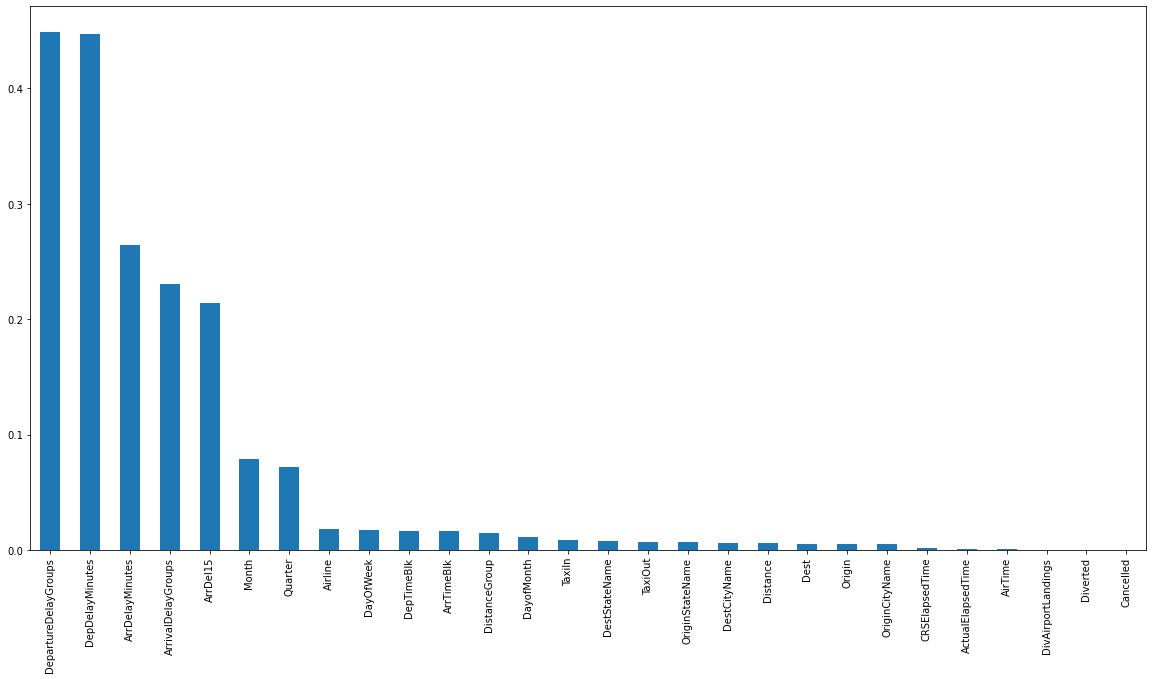

In [78]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,10))

In [79]:
a=mi.sort_values(ascending=False)
for cols in a.iteritems():
    print(cols) 

('DepartureDelayGroups', 0.44877425902026946)
('DepDelayMinutes', 0.4473964353150348)
('ArrDelayMinutes', 0.26456943514166587)
('ArrivalDelayGroups', 0.23030287429606755)
('ArrDel15', 0.21362665588330687)
('Month', 0.07858825250641632)
('Quarter', 0.07186600295727352)
('Airline', 0.017739802223137424)
('DayOfWeek', 0.01755095357218539)
('DepTimeBlk', 0.01604872996343598)
('ArrTimeBlk', 0.01600312355721978)
('DistanceGroup', 0.014804330896206253)
('DayofMonth', 0.011328552137027659)
('TaxiIn', 0.008814739735083288)
('DestStateName', 0.00785318715179617)
('TaxiOut', 0.007111723387775548)
('OriginStateName', 0.00682593559020872)
('DestCityName', 0.005949173061216673)
('Distance', 0.005692182060928808)
('Dest', 0.005383211074670324)
('Origin', 0.005068553000479037)
('OriginCityName', 0.004805798866709621)
('CRSElapsedTime', 0.001807153949325624)
('ActualElapsedTime', 0.0009840889011802911)
('AirTime', 0.0008490132308376364)
('DivAirportLandings', 0.0002179263637429596)
('Diverted', 1.07578

In [88]:
delay_final=flight4[['DepartureDelayGroups','DepDelayMinutes','ArrDelayMinutes','ArrivalDelayGroups','ArrDel15',
'Month','Quarter','Airline','DayOfWeek','DepTimeBlk','ArrTimeBlk','DistanceGroup','DayofMonth','DepDel15']]

In [89]:
delay_final.head()

,DepartureDelayGroups,DepDelayMinutes,ArrDelayMinutes,ArrivalDelayGroups,ArrDel15,Month,Quarter,Airline,DayOfWeek,DepTimeBlk,ArrTimeBlk,DistanceGroup,DayofMonth,DepDel15
0,0,0.0,0.0,0,0,1,1,11,2,7,8,1,23,0
1,0,0.0,0.0,0,0,1,1,11,3,7,8,1,24,0
2,0,0.0,0.0,0,0,1,1,11,4,7,8,1,25,0
3,0,0.0,0.0,0,0,1,1,11,5,7,8,1,26,0
4,0,0.0,0.0,0,0,1,1,11,6,9,10,1,27,0


In [245]:
delay_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028538 entries, 0 to 1028537
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   DepartureDelayGroups  1028538 non-null  int32  
 1   DepDelayMinutes       1028538 non-null  float64
 2   ArrDelayMinutes       1028538 non-null  float64
 3   ArrivalDelayGroups    1028538 non-null  int32  
 4   ArrDel15              1028538 non-null  int32  
 5   Month                 1028538 non-null  int64  
 6   Quarter               1028538 non-null  int64  
 7   Airline               1028538 non-null  int32  
 8   DayOfWeek             1028538 non-null  int64  
 9   DepTimeBlk            1028538 non-null  int32  
 10  ArrTimeBlk            1028538 non-null  int32  
 11  DistanceGroup         1028538 non-null  int64  
 12  DayofMonth            1028538 non-null  int64  
 13  DepDel15              1028538 non-null  int32  
dtypes: float64(2), int32(7), int64(5)


In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(delay_final)

array([[-0.31409659, -0.27600245, -0.28114068, ..., -1.10732026,
         0.78314198, -0.44460482],
       [-0.31409659, -0.27600245, -0.28114068, ..., -1.10732026,
         0.89585806, -0.44460482],
       [-0.31409659, -0.27600245, -0.28114068, ..., -1.10732026,
         1.00857413, -0.44460482],
       ...,
       [-0.31409659, -0.27600245, -0.28114068, ..., -0.67721887,
        -1.13303132, -0.44460482],
       [-0.31409659, -0.27600245, -0.28114068, ...,  3.1936937 ,
        -1.13303132, -0.44460482],
       [ 2.43285109,  1.48122377,  1.62297128, ...,  3.1936937 ,
        -1.13303132,  2.2491884 ]])

# 1>LOGISTIC REGRESSION

In [123]:
# Splitting into train and test data set
X=delay_final.drop(["DepDel15"],axis=1)
y=delay_final["DepDel15"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=None)

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score

In [126]:
lr=LogisticRegression()

In [127]:
lr.fit(X_train,y_train)

C:\Users\rauna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
print("Training Score in LR:=",accuracy_score(y_train,lr.predict(X_train)))
print("Test Score in LR:=",accuracy_score(y_test,lr.predict(X_test)))

Training Score in LR:= 1.0
Test Score in LR:= 1.0


In [129]:
y_pred_lr = lr.predict(X_test) 

In [130]:
print(accuracy_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

1.0
0.0
0.0


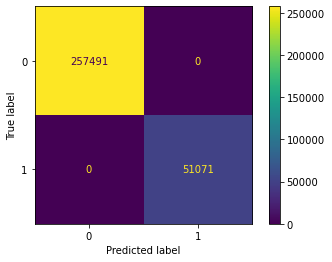

In [131]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [132]:
# Calculate the classification report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257491
           1       1.00      1.00      1.00     51071

    accuracy                           1.00    308562
   macro avg       1.00      1.00      1.00    308562
weighted avg       1.00      1.00      1.00    308562



In [133]:
# Calculate roc_auc_score
roc_auc_lr=(roc_auc_score(y_test, y_pred_lr))
print(roc_auc_lr)

1.0


# NAIVE BAYES

In [134]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [135]:
nb.fit(X_train,y_train)

GaussianNB()

In [136]:
print("Training Scpre in NB:=",accuracy_score(y_train,nb.predict(X_train)))
print("Test Score in NB:=",accuracy_score(y_test,nb.predict(X_test)))

Training Scpre in NB:= 0.9808479727102014
Test Score in NB:= 0.9805614430811311


In [137]:
y_pred_nb = nb.predict(X_test) 

In [138]:
print(accuracy_score(y_test,y_pred_nb))
print(mean_absolute_error(y_test,y_pred_nb))
print(np.sqrt(mean_squared_error(y_test,y_pred_nb)))

0.9805614430811311
0.019438556918868817
0.13942222534039836


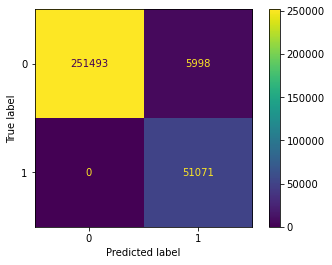

In [139]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_nb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [140]:
# Calculate the classification report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257491
           1       0.89      1.00      0.94     51071

    accuracy                           0.98    308562
   macro avg       0.95      0.99      0.97    308562
weighted avg       0.98      0.98      0.98    308562



In [141]:
# Calculate roc_auc_score
roc_auc_nb=(roc_auc_score(y_test, y_pred_nb))
print(roc_auc_nb)

0.9883529909783255


# DECISION TREE CLASSIFIER

In [142]:
from sklearn.tree import DecisionTreeClassifier
training_accuracy = []
test_accuracy = []
for max_d in range(1,30):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_train, y_train))
    print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_train, y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(X_test,y_test))
    print('')

The Training Accuracy for max_depth 1 is: 1.0
The Validation Accuracy for max_depth 1 is: 1.0

The Training Accuracy for max_depth 2 is: 1.0
The Validation Accuracy for max_depth 2 is: 1.0

The Training Accuracy for max_depth 3 is: 1.0
The Validation Accuracy for max_depth 3 is: 1.0

The Training Accuracy for max_depth 4 is: 1.0
The Validation Accuracy for max_depth 4 is: 1.0

The Training Accuracy for max_depth 5 is: 1.0
The Validation Accuracy for max_depth 5 is: 1.0

The Training Accuracy for max_depth 6 is: 1.0
The Validation Accuracy for max_depth 6 is: 1.0

The Training Accuracy for max_depth 7 is: 1.0
The Validation Accuracy for max_depth 7 is: 1.0

The Training Accuracy for max_depth 8 is: 1.0
The Validation Accuracy for max_depth 8 is: 1.0

The Training Accuracy for max_depth 9 is: 1.0
The Validation Accuracy for max_depth 9 is: 1.0

The Training Accuracy for max_depth 10 is: 1.0
The Validation Accuracy for max_depth 10 is: 1.0

The Training Accuracy for max_depth 11 is: 1.0
T

In [143]:
from sklearn.tree import DecisionTreeClassifier  
dt = DecisionTreeClassifier(random_state = 100)  
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [144]:
print("Training Score in DT:=",accuracy_score(y_train,dt.predict(X_train)))
print("Test Score in DT:=",accuracy_score(y_test,dt.predict(X_test)))

Training Score in DT:= 1.0
Test Score in DT:= 1.0


In [145]:
y_pred_dt = dt.predict(X_test)

In [146]:
print(accuracy_score(y_test,y_pred_dt))
print(mean_absolute_error(y_test,y_pred_dt))
print(np.sqrt(mean_squared_error(y_test,y_pred_dt)))

1.0
0.0
0.0


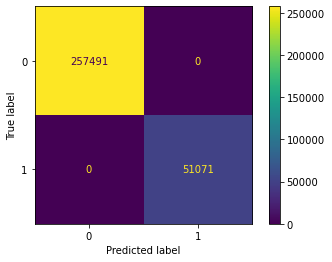

In [147]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [148]:
# Calculate the classification report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257491
           1       1.00      1.00      1.00     51071

    accuracy                           1.00    308562
   macro avg       1.00      1.00      1.00    308562
weighted avg       1.00      1.00      1.00    308562



In [149]:
# Calculate roc_auc_score
roc_auc_dt=(roc_auc_score(y_test, y_pred_dt))
print(roc_auc_dt)

1.0


# KNN

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
#Choosing optimal value of  k 
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15.
neighbors_settings = range(1, 16)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    print('The Training Accuracy for k {} is:'.format(n_neighbors), clf.score(X_test,y_test))
    print('The Validation Accuracy for k {} is:'.format(n_neighbors), clf.score(X_test,y_test))
    print('')
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()

KeyboardInterrupt: 

In [151]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [152]:
print("Training Score in KNN:=",accuracy_score(y_train,knn.predict(X_train)))
print("Test Score in KNN:=",accuracy_score(y_test,knn.predict(X_test)))

Training Score in KNN:= 0.9986971787948488
Test Score in KNN:= 0.9963929453399964


In [153]:
y_pred_knn = knn.predict(X_test)

In [154]:
print(accuracy_score(y_test,y_pred_knn))
print(mean_absolute_error(y_test,y_pred_knn))
print(np.sqrt(mean_squared_error(y_test,y_pred_knn)))

0.9963929453399964
0.0036070546600035
0.06005876006048993


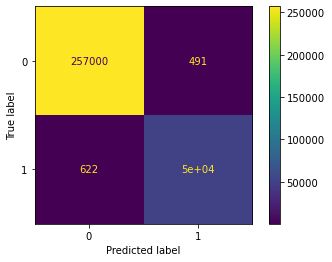

In [155]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [156]:
# Calculate the classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257491
           1       0.99      0.99      0.99     51071

    accuracy                           1.00    308562
   macro avg       0.99      0.99      0.99    308562
weighted avg       1.00      1.00      1.00    308562



In [157]:
# Calculate roc_auc_score
roc_auc_knn=(roc_auc_score(y_test, y_pred_knn))
print(roc_auc_knn)

0.9929570070272057


# ROC-AUC CURVE

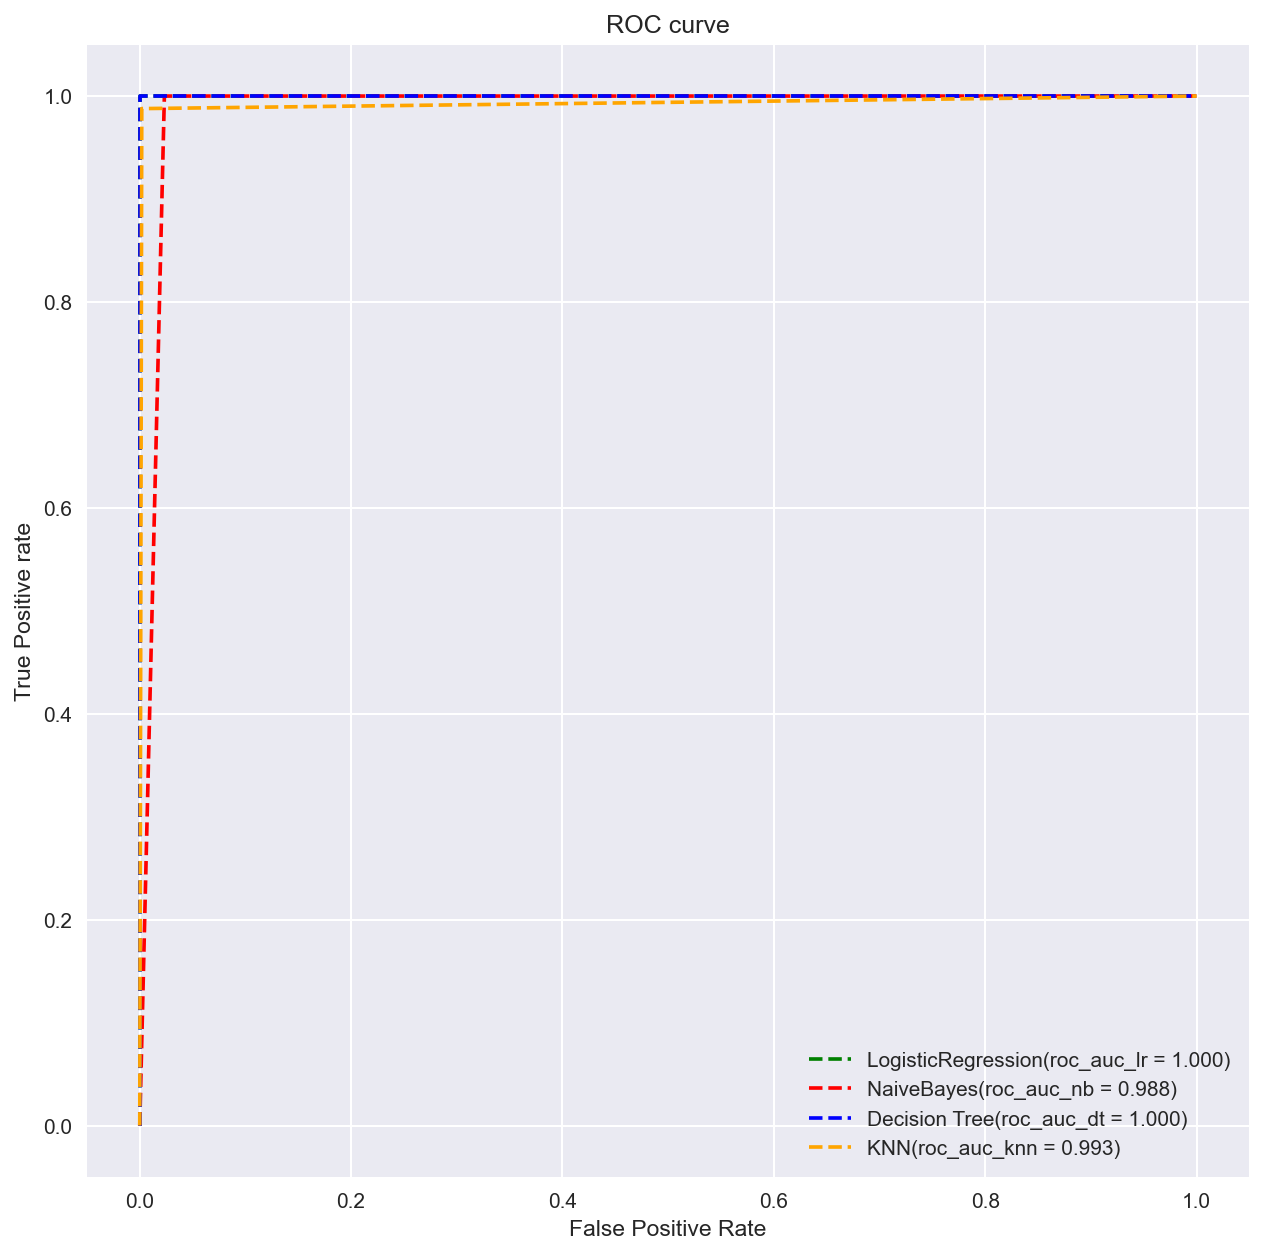

In [158]:
plt.style.use('seaborn')
fpr_lr, tpr_lr, thresh1 = roc_curve(y_test, y_pred_lr)
fpr_nb, tpr_nb, thresh2 = roc_curve(y_test, y_pred_nb)
fpr_dt, tpr_dt, thresh3 = roc_curve(y_test, y_pred_dt)
fpr_knn, tpr_knn, thresh4 = roc_curve(y_test, y_pred_knn)
# plot roc curves
plt.figure(figsize=(10, 10),dpi=150)
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='green', label='LogisticRegression(roc_auc_lr = %0.3f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, linestyle='--',color='red', label='NaiveBayes(roc_auc_nb = %0.3f)' % roc_auc_nb)
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='blue', label='Decision Tree(roc_auc_dt = %0.3f)' % roc_auc_dt)
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='orange', label='KNN(roc_auc_knn = %0.3f)' % roc_auc_knn)

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

# BALANCING THE DATASET

In [159]:
delay_final["DepDel15"].value_counts()

0    858780
1    169758
Name: DepDel15, dtype: int64

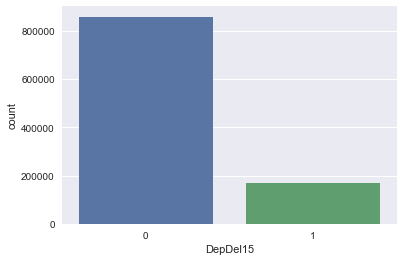

In [163]:
sns.countplot(x='DepDel15',data=delay_final)
plt.show()

In [164]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

In [165]:
# instantiating the random undersampler
res = NearMiss() 

# resampling X, y
X_res, y_res = res.fit_resample(X,y)
print(X_res.shape,y_res.shape)

(339516, 13) (339516,)


In [166]:
print("Original dataset shape:",format(Counter(y)))
print("Resampled dataset shape:",format(Counter(y_res)))

Original dataset shape: Counter({0: 858780, 1: 169758})
Resampled dataset shape: Counter({0: 169758, 1: 169758})


# REAPPLYING THE MODELS ON THE BALANCED DATASET

# 1>LOGISTIC REGRESSION

In [167]:
# Splitting into train and test data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.30,random_state=None)

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score

In [170]:
lr=LogisticRegression()

In [171]:
lr.fit(X_train,y_train)

C:\Users\rauna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [172]:
print("Training Score in LR:=",accuracy_score(y_train,lr.predict(X_train)))
print("Test Score in LR:=",accuracy_score(y_test,lr.predict(X_test)))

Training Score in LR:= 1.0
Test Score in LR:= 1.0


In [173]:
y_pred_lr = lr.predict(X_test) 

In [174]:
print(accuracy_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

1.0
0.0
0.0


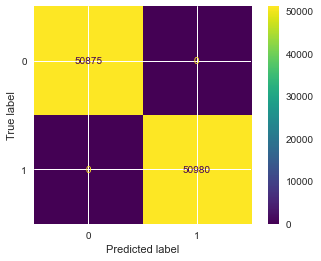

In [175]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [176]:
# Calculate the classification report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50875
           1       1.00      1.00      1.00     50980

    accuracy                           1.00    101855
   macro avg       1.00      1.00      1.00    101855
weighted avg       1.00      1.00      1.00    101855



In [177]:
# Calculate roc_auc_score
roc_auc_lr=(roc_auc_score(y_test, y_pred_lr))
print(roc_auc_lr)

1.0


# NAIVE BAYES

In [178]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [179]:
nb.fit(X_train,y_train)

GaussianNB()

In [180]:
print("Training Scpre in NB:=",accuracy_score(y_train,nb.predict(X_train)))
print("Test Score in NB:=",accuracy_score(y_test,nb.predict(X_test)))

Training Scpre in NB:= 0.9877809148324714
Test Score in NB:= 0.9885229002012665


In [181]:
y_pred_nb = nb.predict(X_test) 

In [182]:
print(accuracy_score(y_test,y_pred_nb))
print(mean_absolute_error(y_test,y_pred_nb))
print(np.sqrt(mean_squared_error(y_test,y_pred_nb)))

0.9885229002012665
0.011477099798733494
0.10713122700097061


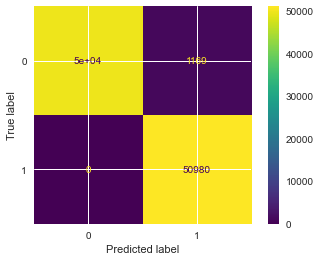

In [183]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_nb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [184]:
# Calculate the classification report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50875
           1       0.98      1.00      0.99     50980

    accuracy                           0.99    101855
   macro avg       0.99      0.99      0.99    101855
weighted avg       0.99      0.99      0.99    101855



In [185]:
# Calculate roc_auc_score
roc_auc_nb=(roc_auc_score(y_test, y_pred_nb))
print(roc_auc_nb)

0.9885110565110565


# DECISION TREE CLASSIFIER

In [186]:
from sklearn.tree import DecisionTreeClassifier
training_accuracy = []
test_accuracy = []
for max_d in range(1,30):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_train, y_train))
    print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_train, y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(X_test,y_test))
    print('')

The Training Accuracy for max_depth 1 is: 1.0
The Validation Accuracy for max_depth 1 is: 1.0

The Training Accuracy for max_depth 2 is: 1.0
The Validation Accuracy for max_depth 2 is: 1.0

The Training Accuracy for max_depth 3 is: 1.0
The Validation Accuracy for max_depth 3 is: 1.0

The Training Accuracy for max_depth 4 is: 1.0
The Validation Accuracy for max_depth 4 is: 1.0

The Training Accuracy for max_depth 5 is: 1.0
The Validation Accuracy for max_depth 5 is: 1.0

The Training Accuracy for max_depth 6 is: 1.0
The Validation Accuracy for max_depth 6 is: 1.0

The Training Accuracy for max_depth 7 is: 1.0
The Validation Accuracy for max_depth 7 is: 1.0

The Training Accuracy for max_depth 8 is: 1.0
The Validation Accuracy for max_depth 8 is: 1.0

The Training Accuracy for max_depth 9 is: 1.0
The Validation Accuracy for max_depth 9 is: 1.0

The Training Accuracy for max_depth 10 is: 1.0
The Validation Accuracy for max_depth 10 is: 1.0

The Training Accuracy for max_depth 11 is: 1.0
T

In [187]:
from sklearn.tree import DecisionTreeClassifier  
dt = DecisionTreeClassifier(random_state = 100)  
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [188]:
print("Training Score in DT:=",accuracy_score(y_train,dt.predict(X_train)))
print("Test Score in DT:=",accuracy_score(y_test,dt.predict(X_test)))

Training Score in DT:= 1.0
Test Score in DT:= 1.0


In [189]:
y_pred_dt = dt.predict(X_test)

In [190]:
print(accuracy_score(y_test,y_pred_dt))
print(mean_absolute_error(y_test,y_pred_dt))
print(np.sqrt(mean_squared_error(y_test,y_pred_dt)))

1.0
0.0
0.0


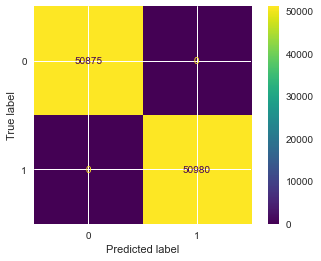

In [191]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [192]:
# Calculate the classification report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50875
           1       1.00      1.00      1.00     50980

    accuracy                           1.00    101855
   macro avg       1.00      1.00      1.00    101855
weighted avg       1.00      1.00      1.00    101855



In [193]:
# Calculate roc_auc_score
roc_auc_dt=(roc_auc_score(y_test, y_pred_dt))
print(roc_auc_dt)

1.0


# KNN

In [194]:
from sklearn.neighbors import KNeighborsClassifier

In [195]:
#Choosing optimal value of  k 
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15.
neighbors_settings = range(1, 16)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    print('The Training Accuracy for k {} is:'.format(n_neighbors), clf.score(X_test,y_test))
    print('The Validation Accuracy for k {} is:'.format(n_neighbors), clf.score(X_test,y_test))
    print('')
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()

KeyboardInterrupt: 

In [196]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [197]:
print("Training Score in KNN:=",accuracy_score(y_train,knn.predict(X_train)))
print("Test Score in KNN:=",accuracy_score(y_test,knn.predict(X_test)))

Training Score in KNN:= 0.9959269716108238
Test Score in KNN:= 0.9890825192675863


In [198]:
y_pred_knn = knn.predict(X_test)

In [199]:
print(accuracy_score(y_test,y_pred_knn))
print(mean_absolute_error(y_test,y_pred_knn))
print(np.sqrt(mean_squared_error(y_test,y_pred_knn)))

0.9890825192675863
0.010917480732413725
0.10448674907572598


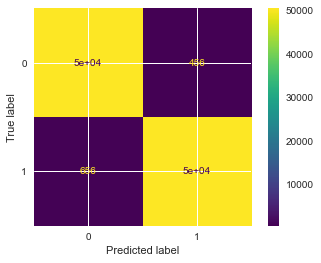

In [200]:
# Calculate the confusion matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [201]:
# Calculate the classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     50875
           1       0.99      0.99      0.99     50980

    accuracy                           0.99    101855
   macro avg       0.99      0.99      0.99    101855
weighted avg       0.99      0.99      0.99    101855



In [202]:
# Calculate roc_auc_score
roc_auc_knn=(roc_auc_score(y_test, y_pred_knn))
print(roc_auc_knn)

0.9890845318730763


# ROC-AUC CURVE

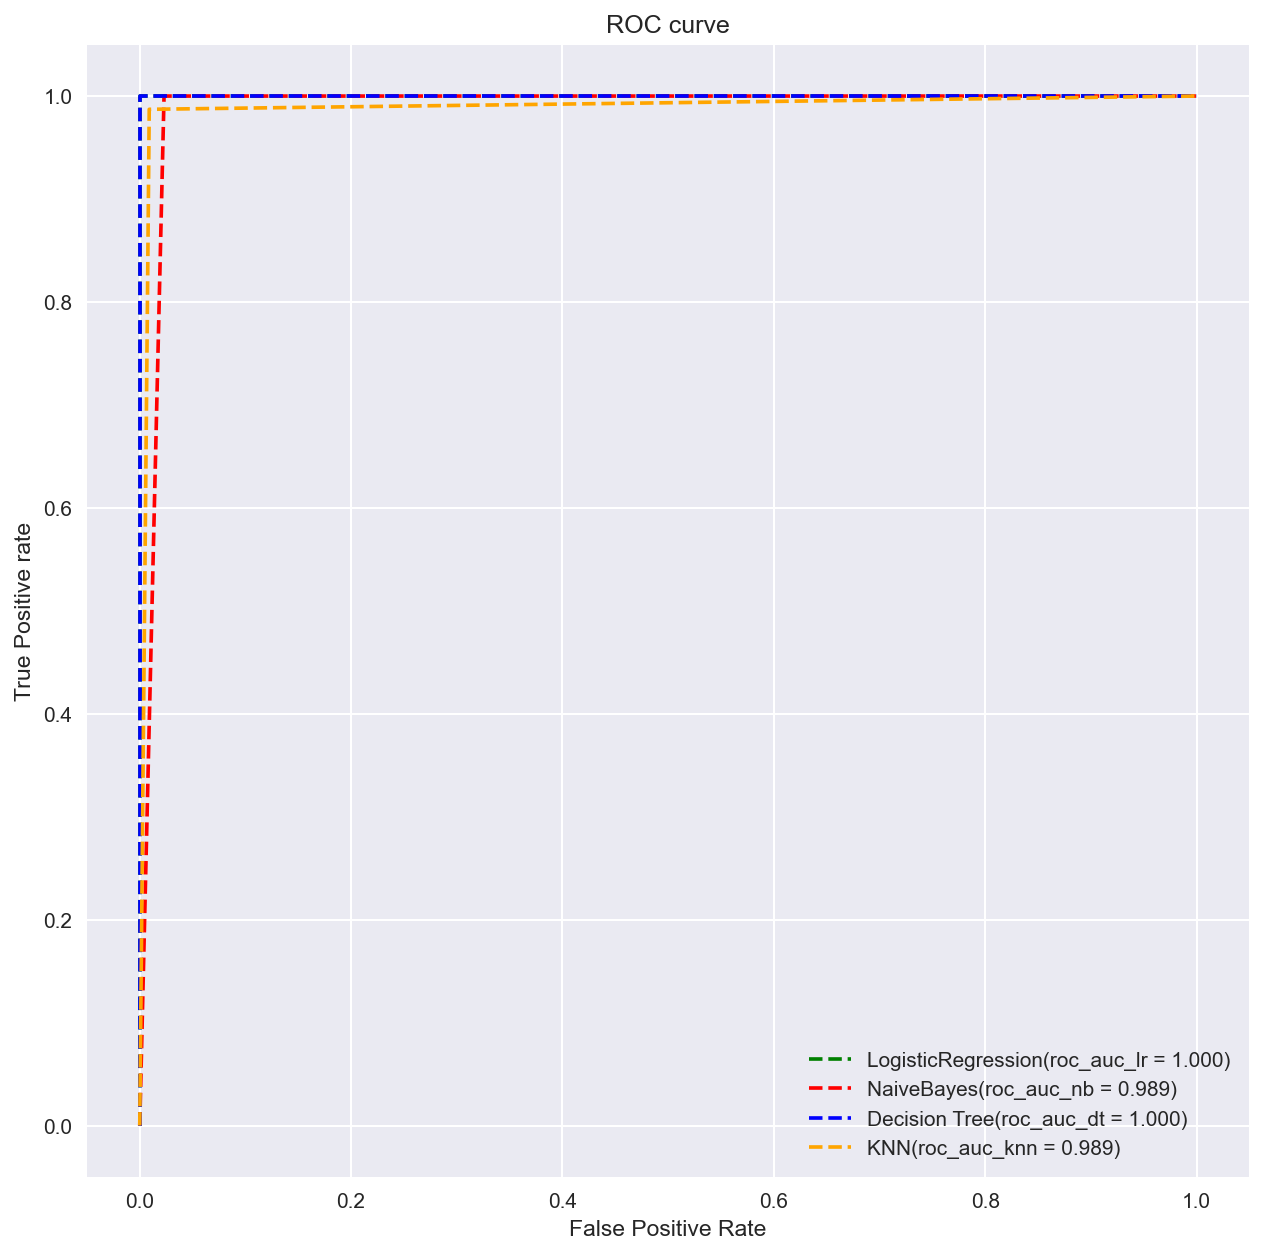

In [203]:
plt.style.use('seaborn')
fpr_lr, tpr_lr, thresh1 = roc_curve(y_test, y_pred_lr)
fpr_nb, tpr_nb, thresh2 = roc_curve(y_test, y_pred_nb)
fpr_dt, tpr_dt, thresh3 = roc_curve(y_test, y_pred_dt)
fpr_knn, tpr_knn, thresh4 = roc_curve(y_test, y_pred_knn)
# plot roc curves
plt.figure(figsize=(10, 10),dpi=150)
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='green', label='LogisticRegression(roc_auc_lr = %0.3f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, linestyle='--',color='red', label='NaiveBayes(roc_auc_nb = %0.3f)' % roc_auc_nb)
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='blue', label='Decision Tree(roc_auc_dt = %0.3f)' % roc_auc_dt)
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='orange', label='KNN(roc_auc_knn = %0.3f)' % roc_auc_knn)

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

# PROBLEM: TO BUILD A REGRESSION MODEL TO PREDICT DELAY TIME

In [208]:
X=flight4.drop(["DepDelayMinutes"],axis=1)
y=flight4["DepDelayMinutes"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=None)

In [209]:
from sklearn.feature_selection import mutual_info_regression
mi2=mutual_info_regression(X_train,y_train)
mi2

array([2.21866363e-02, 1.32488046e-02, 9.83891774e-03, 8.21743485e-05,
       0.00000000e+00, 4.89100682e-01, 1.98762380e-03, 9.15527133e-03,
       3.04610279e-03, 1.57021059e-02, 0.00000000e+00, 1.92340073e-03,
       1.38693800e-02, 3.24192163e-03, 8.91772808e-03, 6.24334523e-03,
       8.64598346e-03, 7.11119834e-03, 4.48436812e-01, 7.74819797e-01,
       1.83129361e-02, 5.69589911e-03, 1.07652341e-03, 2.53979617e-01,
       4.02207967e-01, 1.73501797e-02, 1.72990962e-03, 1.28938635e-03])

In [210]:
mi2=pd.Series(mi2)
mi2.index=X_train.columns
mi2.sort_values(ascending=False)

DepartureDelayGroups    0.774820
ArrDelayMinutes         0.489101
DepDel15                0.448437
ArrivalDelayGroups      0.402208
ArrDel15                0.253980
Airline                 0.022187
DepTimeBlk              0.018313
ArrTimeBlk              0.017350
Distance                0.015702
DayofMonth              0.013869
Origin                  0.013249
Dest                    0.009839
CRSElapsedTime          0.009155
OriginCityName          0.008918
DestCityName            0.008646
DestStateName           0.007111
OriginStateName         0.006243
TaxiOut                 0.005696
DayOfWeek               0.003242
ActualElapsedTime       0.003046
AirTime                 0.001988
Month                   0.001923
DistanceGroup           0.001730
DivAirportLandings      0.001289
TaxiIn                  0.001077
Cancelled               0.000082
Quarter                 0.000000
Diverted                0.000000
dtype: float64

In [212]:
b=mi2.sort_values(ascending=False)
for cols in b.iteritems():
    print(cols) 

('DepartureDelayGroups', 0.7748197965814336)
('ArrDelayMinutes', 0.4891006816026975)
('DepDel15', 0.44843681210957254)
('ArrivalDelayGroups', 0.4022079670863228)
('ArrDel15', 0.2539796172873565)
('Airline', 0.022186636294883932)
('DepTimeBlk', 0.01831293606447204)
('ArrTimeBlk', 0.0173501796649278)
('Distance', 0.015702105900263774)
('DayofMonth', 0.013869379951284344)
('Origin', 0.013248804646602608)
('Dest', 0.009838917735329744)
('CRSElapsedTime', 0.009155271332963011)
('OriginCityName', 0.008917728081714316)
('DestCityName', 0.008645983457606476)
('DestStateName', 0.007111198337746316)
('OriginStateName', 0.006243345233055919)
('TaxiOut', 0.005695899111293201)
('DayOfWeek', 0.0032419216252526084)
('ActualElapsedTime', 0.0030461027907584537)
('AirTime', 0.0019876238037390692)
('Month', 0.0019234007332293857)
('DistanceGroup', 0.0017299096215230847)
('DivAirportLandings', 0.00128938634537068)
('TaxiIn', 0.0010765234136043134)
('Cancelled', 8.217434851065519e-05)
('Quarter', 0.0)
('Di

<AxesSubplot:>

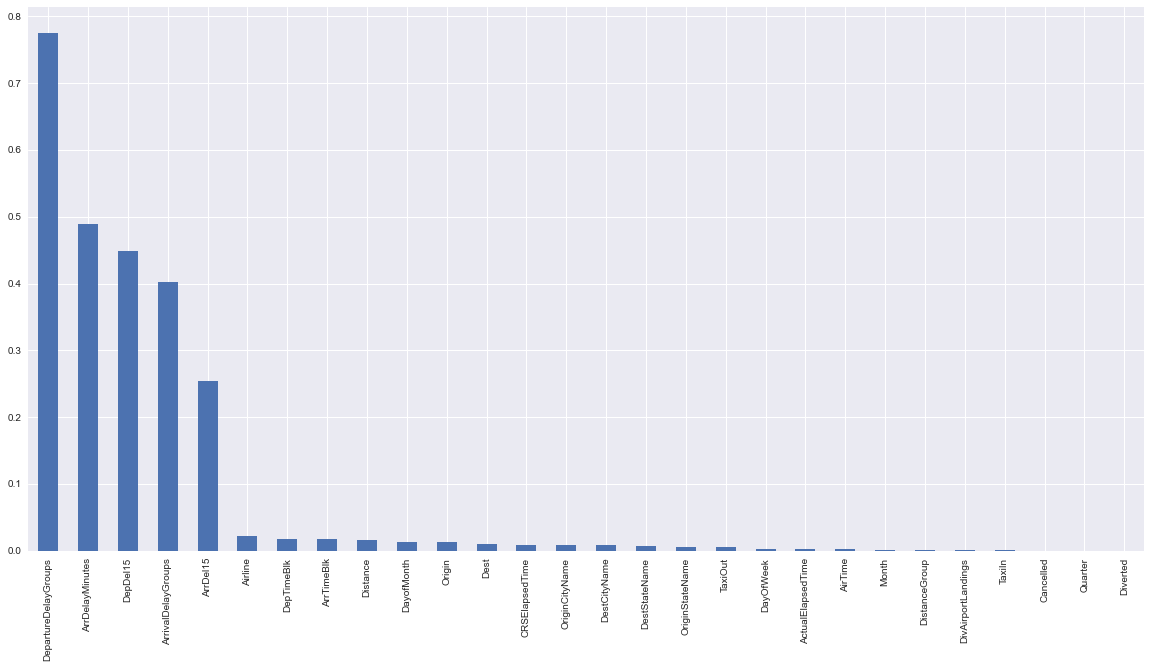

In [213]:
mi2.sort_values(ascending=False).plot.bar(figsize=(20,10))

In [214]:
delay_reg=flight4[['DepartureDelayGroups','ArrDelayMinutes','DepDel15','ArrivalDelayGroups','ArrDel15',
'Airline','DepTimeBlk','ArrTimeBlk','Distance','DayofMonth','Origin','Dest','CRSElapsedTime','DepDelayMinutes']]

In [246]:
delay_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028538 entries, 0 to 1028537
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   DepartureDelayGroups  1028538 non-null  int32  
 1   ArrDelayMinutes       1028538 non-null  float64
 2   DepDel15              1028538 non-null  int32  
 3   ArrivalDelayGroups    1028538 non-null  int32  
 4   ArrDel15              1028538 non-null  int32  
 5   Airline               1028538 non-null  int32  
 6   DepTimeBlk            1028538 non-null  int32  
 7   ArrTimeBlk            1028538 non-null  int32  
 8   Distance              1028538 non-null  float64
 9   DayofMonth            1028538 non-null  int64  
 10  Origin                1028538 non-null  int32  
 11  Dest                  1028538 non-null  int32  
 12  CRSElapsedTime        1028538 non-null  float64
 13  DepDelayMinutes       1028538 non-null  float64
dtypes: float64(4), int32(9), int64(1)


In [215]:
delay_reg.head()

,DepartureDelayGroups,ArrDelayMinutes,DepDel15,ArrivalDelayGroups,ArrDel15,Airline,DepTimeBlk,ArrTimeBlk,Distance,DayofMonth,Origin,Dest,CRSElapsedTime,DepDelayMinutes
0,0,0.0,0,0,0,11,7,8,145.0,23,4,20,62.0,0.0
1,0,0.0,0,0,0,11,7,8,145.0,24,4,20,62.0,0.0
2,0,0.0,0,0,0,11,7,8,145.0,25,4,20,62.0,0.0
3,0,0.0,0,0,0,11,7,8,145.0,26,4,20,62.0,0.0
4,0,0.0,0,0,0,11,9,10,145.0,27,4,20,60.0,0.0


In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(delay_reg)

array([[-0.31409659, -0.28114068, -0.44460482, ..., -1.57957233,
        -1.04442399, -0.27600245],
       [-0.31409659, -0.28114068, -0.44460482, ..., -1.57957233,
        -1.04442399, -0.27600245],
       [-0.31409659, -0.28114068, -0.44460482, ..., -1.57957233,
        -1.04442399, -0.27600245],
       ...,
       [-0.31409659, -0.28114068, -0.44460482, ..., -0.87618231,
        -0.71575874, -0.27600245],
       [-0.31409659, -0.28114068, -0.44460482, ..., -0.64171898,
         2.65305999, -0.27600245],
       [ 2.43285109,  1.62297128,  2.2491884 , ...,  0.10244727,
         2.47503298,  1.48122377]])

# DECISION TREE REGRESSION

In [217]:
X=delay_reg.drop(["DepDelayMinutes"],axis=1)
y=delay_reg["DepDelayMinutes"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=None)

In [218]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [221]:
from sklearn.metrics import r2_score
print("Training R^2 Score in DecisionTreeRegressor:=",r2_score(y_train,dtr.predict(X_train)))
print("Test R^2 Score in DecisionTreeRegressor:=",r2_score(y_test,dtr.predict(X_test)))

Training R^2 Score in DecisionTreeRegressor:= 0.9999878538172359
Test R^2 Score in DecisionTreeRegressor:= 0.9869682100749763


In [222]:
y_pred_dtr=dtr.predict(X_test)

In [224]:
from sklearn.metrics import mean_absolute_error
print("MAE of DTR=",mean_absolute_error(y_test,y_pred_dtr))

MAE of DTR= 2.3050926556089215


In [225]:
from sklearn.metrics import mean_squared_error
print("MSE of DTR",mean_squared_error(y_test,y_pred_dtr))

MSE of DTR 23.010877518582614


In [227]:
print("RMSE of DTR",np.sqrt(mean_squared_error(y_test,y_pred_dtr)))

RMSE of DTR 4.796965448966942


# RANDOM FOREST REGRESSION

In [228]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [244]:
from sklearn.metrics import r2_score
print("Training R^2 Score in RANDOM FOREST Regressor:=",r2_score(y_train,rfr.predict(X_train)))
print("Test R^2 Score in RANDOM FOREST Regressor:=",r2_score(y_test,rfr.predict(X_test)))

Training R^2 Score in RANDOM FOREST Regressor:= 0.9990363231720915
Test R^2 Score in RANDOM FOREST Regressor:= 0.9932416369458218


In [229]:
y_pred_rfr=rfr.predict(X_test)

In [230]:
from sklearn.metrics import mean_absolute_error
print("MAE of RFR=",mean_absolute_error(y_test,y_pred_rfr))

MAE of RFR= 1.9482152242799546


In [231]:
from sklearn.metrics import mean_squared_error
print("MSE of RFR",mean_squared_error(y_test,y_pred_rfr))

MSE of RFR 11.933576689046093


In [232]:
print("RMSE of DTR",np.sqrt(mean_squared_error(y_test,y_pred_rfr)))

RMSE of DTR 3.454500931979335


# XGBoost REGRESSION

In [235]:
from xgboost import XGBRegressor
xgb_rg = XGBRegressor()
xgb_rg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [236]:
from sklearn.metrics import r2_score
print("Training R^2 Score in XGBoost Regressor:=",r2_score(y_train,xgb_rg.predict(X_train)))
print("Test R^2 Score in XGBoost Regressor:=",r2_score(y_test,xgb_rg.predict(X_test)))

Training R^2 Score in XGBoost Regressor:= 0.9950168244588845
Test R^2 Score in XGBoost Regressor:= 0.9935786515902241


In [237]:
y_pred_xgbr=xgb_rg.predict(X_test)

In [241]:
from sklearn.metrics import mean_absolute_error
print("MAE of XGBRegressor=",mean_absolute_error(y_test,y_pred_xgbr))

MAE of XGBRegressor= 1.8936343669497613


In [242]:
from sklearn.metrics import mean_squared_error
print("MSE of XGBRegressor",mean_squared_error(y_test,y_pred_xgbr))

MSE of XGBRegressor 11.338493224002075


In [243]:
print("RMSE of XGBRegressor",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

RMSE of XGBRegressor 3.3672679168729767
